# **6 Statistische Modelle - Multiple Lineare Regression - Beispiel 2**
------------------------------------------------

## a) Notwendige Bibliotheken laden

**LIBRARIES:**

* pandas für Verarbeitung von Tabellen-Daten
* numpy für die Berechnung von Zusammenhängen (z.B. Korrelationen)
* missingno für die Visualisierung von fehlenden Datenpunkten
* matplotlib, seaborn, plotly für die Visualisierung
* scikit learn für die statistische Modellierung



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
import plotly.express as px

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

## b) Daten einlesen und Überblick über die ersten Zeilen verschaffen

In [2]:
cars = pd.read_csv('CarPrices_miss.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# *Datensatz CarPrices.csv - Metadaten*
---------------------------------------------------

Dieser fiktive Datensatz enthält Informationen zu diversen Automobilmarken, Modellen und deren Eigenschaften. Ziel dieses Übungsdatensatzes besteht in der Untersuchung von Zusammenhängen zwischen den Gebrauchtwagenpreisen (in USD) der Fahrzeuge und deren Eigenschaften.

Quelle: www.kaggle.com

# **Attribute:**

* Typ, Kraftstoffart, Ansaugung, Türanzahl, Karosserie, Antrieb, Motorposition, Radstand, Länge, Breite, Höhe, Leergewicht, Motortyp, Zylinderanzahl, Motorgröße, Kraftstoffsystem, Kompressionsverhältnis, PS, maximale Drehzahl, Verbrauch in Miles per gallon - Stadt, Verbrauch in Miles per gallon - Autobahn, Preis

* Achtung: wir wissen kaum was über die verwendeten Einheiten --> siehe Automaße!

In [3]:
cars.shape

(205, 26)

In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## c) Fehlende Werte

*   Abfrage mit function isnull
*   **Visualisierung** mit missingno



In [5]:
for col in cars.columns:
    pct_missing = cars[col].isnull().sum()
    print(f'{col} - {pct_missing :}')

car_ID - 0
symboling - 0
CarName - 0
fueltype - 0
aspiration - 0
doornumber - 0
carbody - 0
drivewheel - 0
enginelocation - 44
wheelbase - 0
carlength - 0
carwidth - 0
carheight - 0
curbweight - 0
enginetype - 0
cylindernumber - 0
enginesize - 0
fuelsystem - 0
boreratio - 0
stroke - 0
compressionratio - 0
horsepower - 0
peakrpm - 0
citympg - 0
highwaympg - 0
price - 0


## d) Duplikate

redundante Datenpunkte finden und entfernen

In [6]:
cars.duplicated().sum()

0

## e) Bereinigen des Datensatzes

* Einträge mit fehlenden Daten entfernen - Achtung! Bei großen Verlusten gezieltes Anpassen der Filter! --> dropna
* Redundante Datensätze löschen --> drop_duplicates

In [7]:
incomplete_columns = list(cars.columns[cars.isnull().any()])
cars3 = cars
for col in incomplete_columns:
   cars3[col] = cars[col].fillna('unknown')
cars3.shape

(205, 26)

## f) Konsolidieren

* Zusammenfassen von Attributen
* Typos entfernen
* Formate vereinheitlichen - z.B. Datum...

In [8]:
# Trennen Marke vom Modell
CompanyName = cars3['CarName'].apply(lambda x : x.split(' ')[0])
cars3.insert(3,"CompanyName",CompanyName)
cars3.drop(['CarName'],axis=1,inplace=True)
cars3.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
cars3.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Das sind wohle einige Typos + ähnliche Namen für die gleiche Marke vergeben --> bereinigen!

In [10]:
cars3.CompanyName = cars3.CompanyName.str.lower()

def replace_name(a,b):
    cars3.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
replace_name('alfa-romero','alfa-romeo')

cars3.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## g) Erste Übersicht visualisieren

* hilfreich zur Bewertung der Datenqualität
* fließender Übergang zur EDA

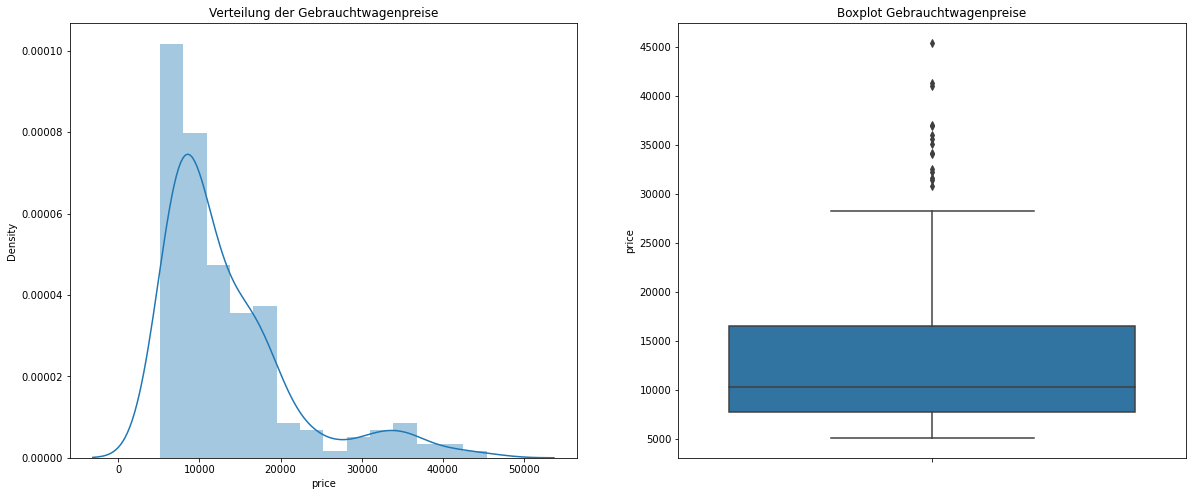

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Verteilung der Gebrauchtwagenpreise')
sns.distplot(cars3.price)

plt.subplot(1,2,2)
plt.title('Boxplot Gebrauchtwagenpreise')
sns.boxplot(y=cars3.price)

plt.show()

# 5.2 EDA

* Verteilung Car Company
* Darstellung fuel types
-------

* Verteilung Car Company in Abhängigkeit von den Preisen
* Zylinderanzahl - Verteilung und in Abhängigkeit von Preisen
* Streudiagramme - Autolänge - Preis, Leergewicht - Preis









.

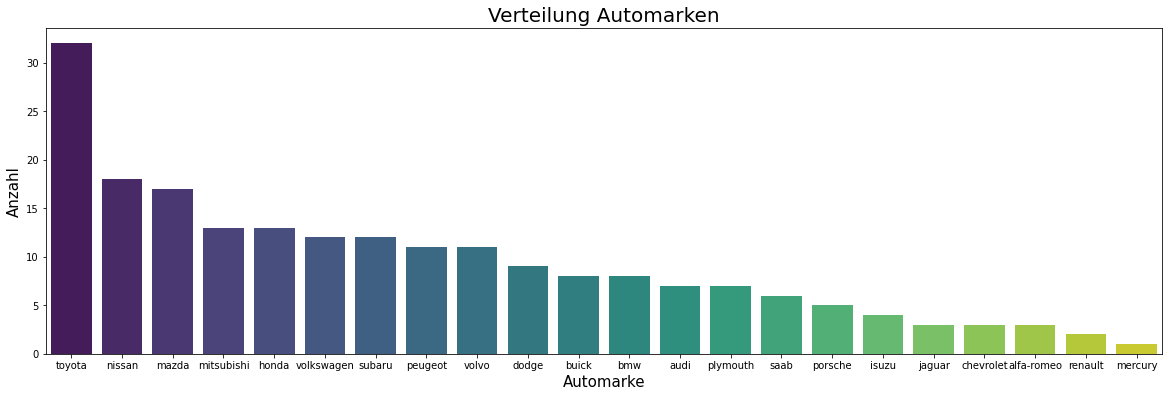

In [12]:
plt.figure(figsize=(20, 6))

sns.countplot(data = cars3, x = 'CompanyName', order = cars3['CompanyName'].value_counts().index,palette="viridis")
plt.title("Verteilung Automarken",fontsize=20)
plt.xlabel("Automarke",fontsize=15)
plt.ylabel("Anzahl",fontsize=15)

plt.show()

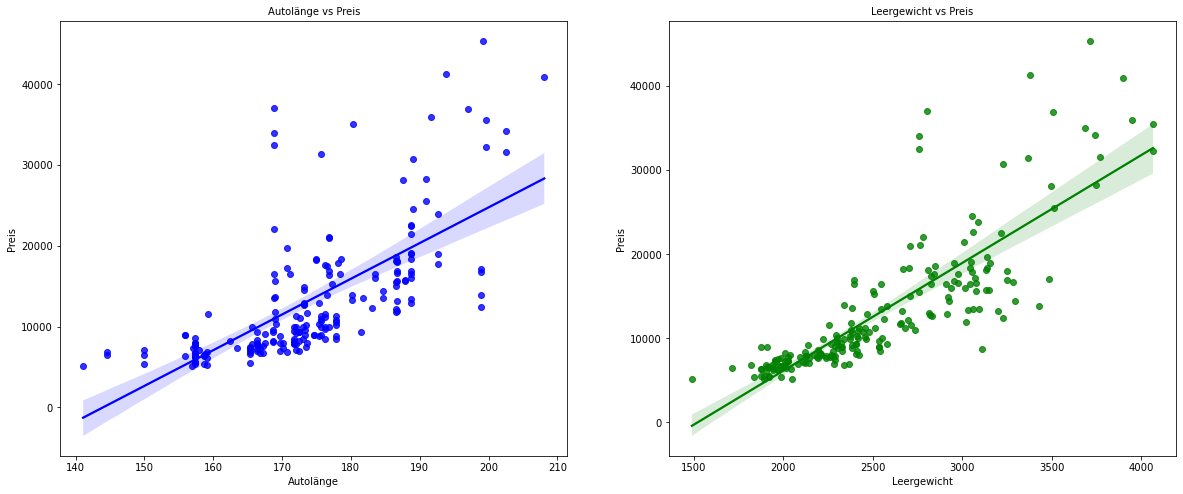

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.regplot(data=cars3, x=cars3['carlength'], y=cars3['price'], marker='o', color='blue')
plt.title('Autolänge vs Preis', fontsize=10)
plt.ylabel('Preis')
plt.xlabel('Autolänge')

plt.subplot(1,2,2)
sns.regplot(data=cars3, x=cars3['curbweight'], y=cars3['price'], marker='o', color='green')
plt.title('Leergewicht vs Preis', fontsize=10)
plt.ylabel('Preis')
plt.xlabel('Leergewicht')

plt.show()

In [14]:
correlation_coefficient1 = cars3['carlength'].corr(cars3['price'])
correlation_coefficient2 = cars3['curbweight'].corr(cars3['price'])
print("Correlation Coefficients: Zylinder-Preis R1 = ", correlation_coefficient1, " und Leergewicht-Preis R2 = ",correlation_coefficient2)

Correlation Coefficients: Zylinder-Preis R1 =  0.6829200156779629  und Leergewicht-Preis R2 =  0.8353048793372965


----------------------------
# Statistische Modellierung

In [15]:
# Teildatensatz erzeugen - Datenbereinigung (mal wieder)
cars_lr = cars3[['price', 'fueltype', 'carbody', 'drivewheel','wheelbase',
                  'curbweight', 'cylindernumber', 'enginesize', 'horsepower',
                    'carlength']]
cars_lr.head()

,price,fueltype,carbody,drivewheel,wheelbase,curbweight,cylindernumber,enginesize,horsepower,carlength
0,13495.0,gas,convertible,rwd,88.6,2548,four,130,111,168.8
1,16500.0,gas,convertible,rwd,88.6,2548,four,130,111,168.8
2,16500.0,gas,hatchback,rwd,94.5,2823,six,152,154,171.2
3,13950.0,gas,sedan,fwd,99.8,2337,four,109,102,176.6
4,17450.0,gas,sedan,4wd,99.4,2824,five,136,115,176.6


**Multi-variate Analyse**: Überblick über die Abhängigkeiten zwischen den numerischen Variablen

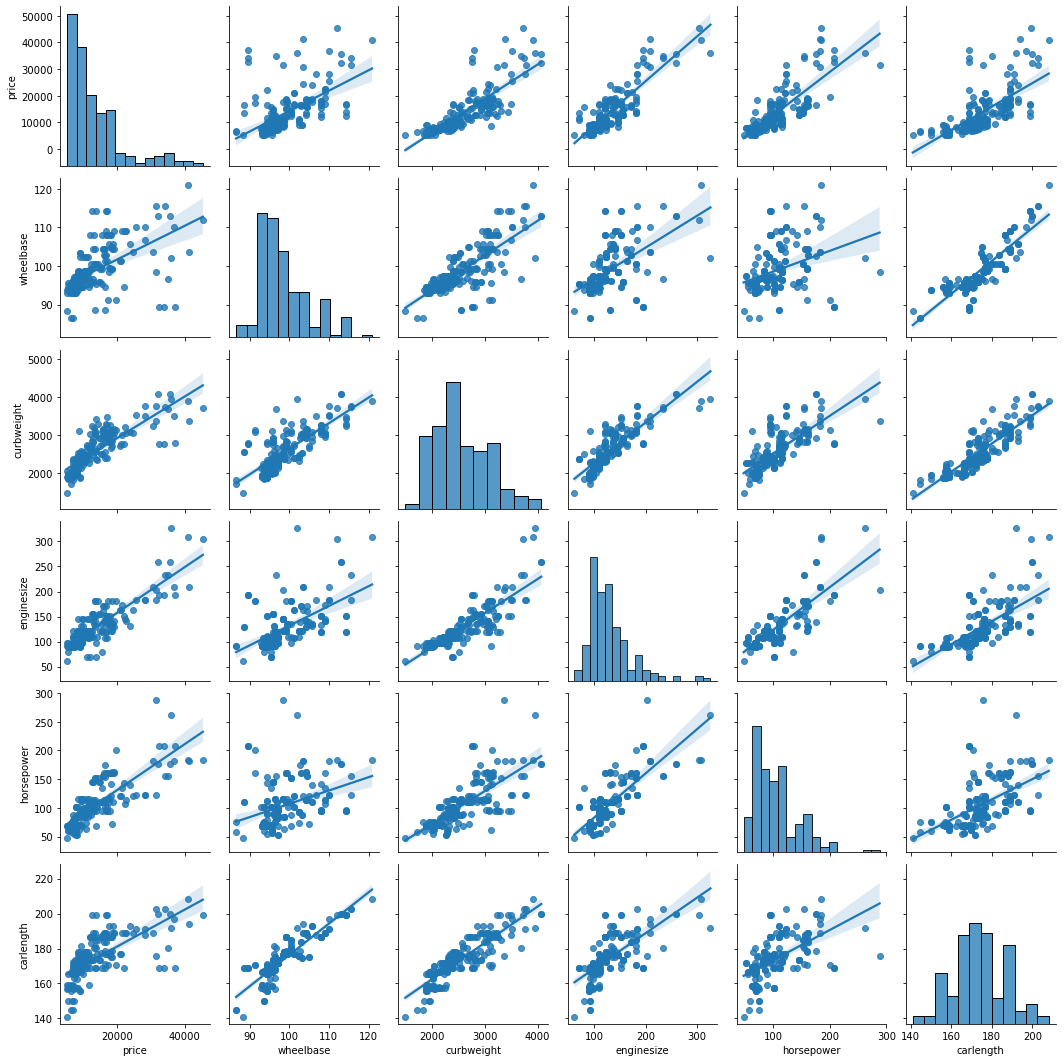

In [16]:
sns.pairplot(cars_lr, kind = 'reg')
plt.show()

## **One-Hot Encoding: Dummievariablen einführen** für die nicht-numerischen Variablen (z.B. drivewheel)
--> mit astype(int) logische Auswertung als (0 oder 1), damit haben wir eine Zahl zum Rechnen!

In [17]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True).astype(int)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

cars_lr1 = dummies('fueltype',cars_lr)
cars_lr1 = dummies('carbody',cars_lr1)
cars_lr1 = dummies('drivewheel',cars_lr1)
cars_lr1 = dummies('cylindernumber',cars_lr1)

cars_lr1.head()

,price,wheelbase,curbweight,enginesize,horsepower,carlength,gas,hardtop,hatchback,sedan,wagon,fwd,rwd,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,111,168.8,1,0,0,0,0,0,1,0,1,0,0,0,0
1,16500.0,88.6,2548,130,111,168.8,1,0,0,0,0,0,1,0,1,0,0,0,0
2,16500.0,94.5,2823,152,154,171.2,1,0,1,0,0,0,1,0,0,1,0,0,0
3,13950.0,99.8,2337,109,102,176.6,1,0,0,1,0,1,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,115,176.6,1,0,0,1,0,0,0,1,0,0,0,0,0


In [18]:
cars_lr1.shape

(205, 19)

------------------
## **Splitten des Datensatzes** in Trainings- und Test-Daten

In [19]:
np.random.seed(0)
df_train, df_test = train_test_split(cars_lr1, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,price,wheelbase,curbweight,enginesize,horsepower,carlength,gas,hardtop,hatchback,sedan,wagon,fwd,rwd,five,four,six,three,twelve,two
122,7609.0,93.7,2191,98,68,167.3,1,0,0,1,0,1,0,0,1,0,0,0,0
125,22018.0,94.5,2778,151,143,168.9,1,0,1,0,0,0,1,0,1,0,0,0,0
166,9538.0,94.5,2300,98,112,168.7,1,0,1,0,0,0,1,0,1,0,0,0,0
1,16500.0,88.6,2548,130,111,168.8,1,0,0,0,0,0,1,0,1,0,0,0,0
199,18950.0,104.3,3157,130,162,188.8,1,0,0,0,1,0,1,0,1,0,0,0,0


##**MinMaxScaler** --> sollte verwendet werden, wenn die Größenordnungen der einzelnen Variablen sehr weit verteilt sind
(Normieren der numerischen Trainingsdaten, um einen für alle Variablen gleichen Wertebereich zwischen 0 und 1 zu erreichen)


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'horsepower','carlength','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,wheelbase,curbweight,enginesize,horsepower,carlength,gas,hardtop,hatchback,sedan,wagon,fwd,rwd,five,four,six,three,twelve,two
122,0.068818,0.244828,0.272692,0.139623,0.083333,0.426016,1,0,0,1,0,1,0,0,1,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,0.395833,0.452033,1,0,1,0,0,0,1,0,1,0,0,0,0
166,0.122110,0.272414,0.314973,0.139623,0.266667,0.448780,1,0,1,0,0,0,1,0,1,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.262500,0.450407,1,0,0,0,0,0,1,0,1,0,0,0,0
199,0.382131,0.610345,0.647401,0.260377,0.475000,0.775610,1,0,0,0,1,0,1,0,1,0,0,0,0


## **Visualisieren der Abhängigkeiten** - Korrelationen als Heatmap

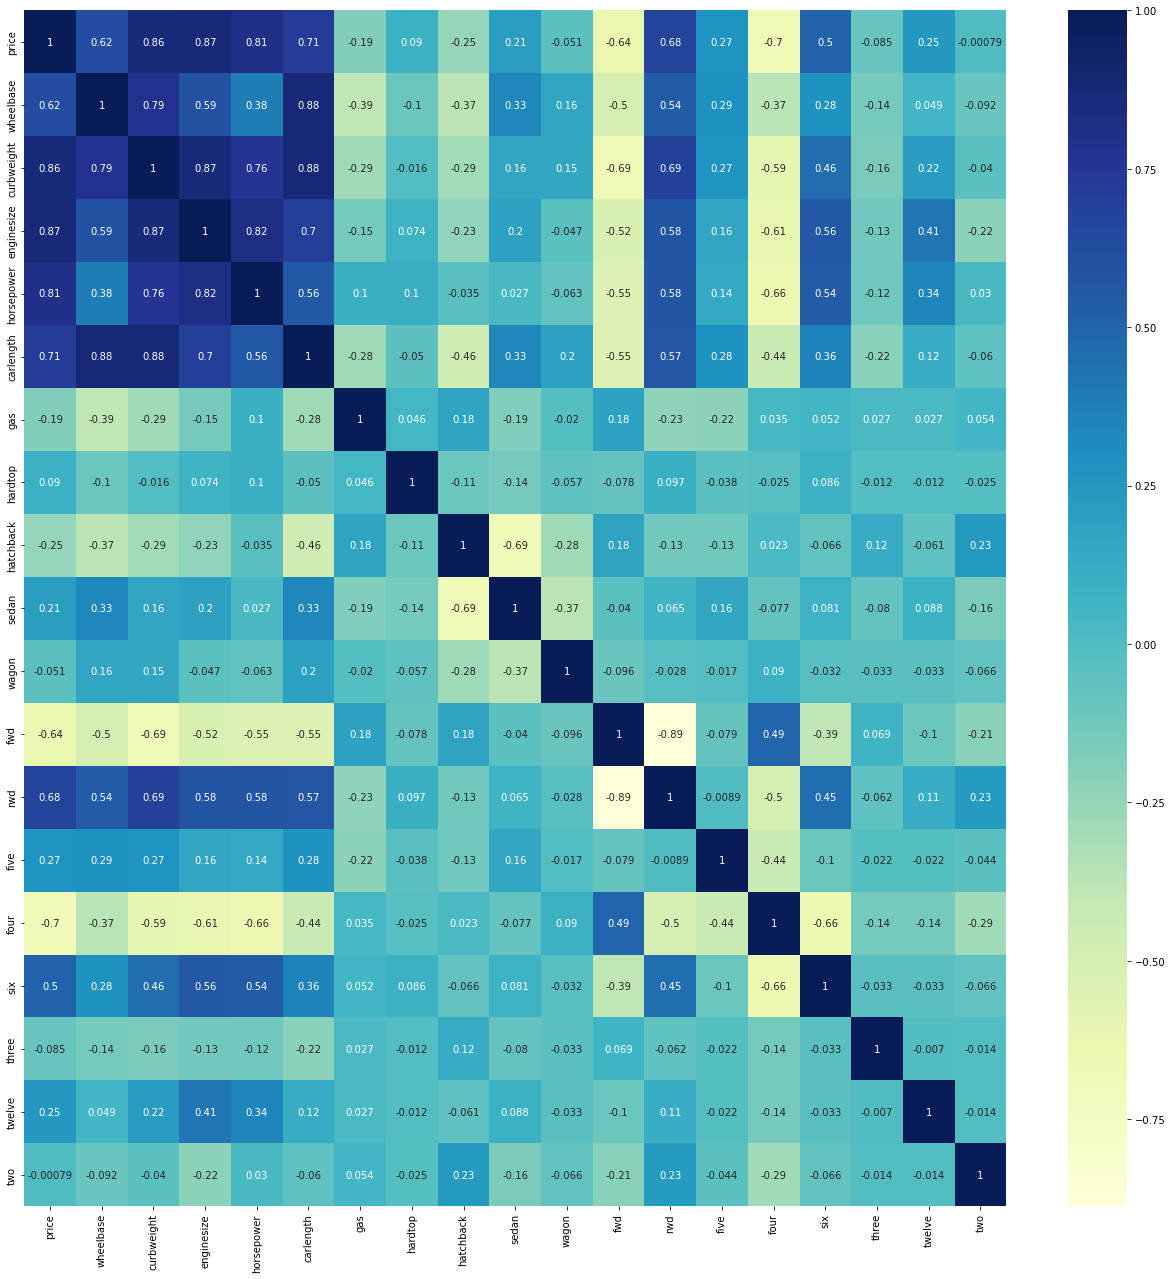

In [21]:
plt.figure(figsize = (22, 22))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Highly correlated variables to price** are - curbweight, enginesize, horsepower, carlength

+ **Festlegung Zielvariable** --> Price (abhängige Variable y)
+ **unabhängige Variablen X**


In [22]:
y_train = df_train.pop('price')
X_train = df_train

------------------------
## **Modell bauen**

* statsmodels tools einladen
* recursive feature elimination (RFE): welche Spalten tragen wesentlich zur Variabilität der abhängigen Variable bei - die nehmen wir, um das Modell zu bauen
* iterative Modellbildung unter Prüfung Signifikanz und Kolinearität

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Statistisches Modell: Multiple Lineare Regression**

**Algorithmische Feature selection -->
RFE = Rekursive Feature Elimination**

--> https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Das Ziel der rekursiven Merkmalseliminierung (RFE) besteht darin, Merkmale auszuwählen, indem rekursiv immer kleinere Merkmalsmengen berücksichtigt werden. Zunächst wird der Schätzer auf der anfänglichen Merkmalsmenge trainiert, und die Wichtigkeit jedes Merkmals wird entweder durch ein bestimmtes Attribut /Parameter ermittelt. Dann werden die am wenigsten wichtigen Merkmale aus der aktuellen Merkmalsgruppe entfernt. Diese Prozedur wird rekursiv mit der bereinigten Menge wiederholt, bis die gewünschte Anzahl der auszuwählenden Merkmale schließlich erreicht ist.

In [24]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [25]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'curbweight', 'enginesize', 'horsepower', 'carlength',
       'rwd', 'four', 'six', 'twelve'],
      dtype='object')

In [26]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [27]:
#function Modellbildung
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

#function Prüfen des variance inflation factors (zeigt Kolinearität)
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

**Der VIF ist ein Maß dafür, wie stark die Varianz eines Regressors (unabhängige Variable x) durch andere Regressoren (andere unabhängige Variablen x) im Modell erklärt wird.** Es wird typischerweise in der Multikollinearitätsanalyse verwendet, um festzustellen, ob es starke Korrelationen zwischen den unabhängigen Variablen gibt. Hohe VIF-Werte deuten darauf hin, dass eine Variable durch andere im Modell stark erklärt werden kann, was die Interpretation der Koeffizienten in einer Regression erschweren kann.

## Modell 1

In [28]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     91.55
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.40e-52
Time:                        13:33:08   Log-Likelihood:                 158.05
No. Observations:                 143   AIC:                            -296.1
Df Residuals:                     133   BIC:                            -266.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0081      0.034      0.240      0.8

# Modell 2

**carlength** hat einen großen p-Wert, entfernen

In [29]:
X_train_new = X_train_rfe.drop(["carlength"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     103.8
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.33e-53
Time:                        13:33:09   Log-Likelihood:                 158.05
No. Observations:                 143   AIC:                            -298.1
Df Residuals:                     134   BIC:                            -271.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0088      0.033      0.267      0.7

# Modell 3

curbweight entfernen - zeigt starke Kolinearität (VIF)
* **Typische Grenzwerte für den VIF:**
  * VIF < 5:
        Allgemein akzeptabel. Ein VIF-Wert unter 5 weist in der Regel auf eine geringe bis moderate Multikollinearität hin, die normalerweise unproblematisch ist.
  * VIF zwischen 5 und 10:
        Eine Variable mit einem VIF-Wert in diesem Bereich zeigt mäßige Multikollinearität an. Einige Fachleute betrachten diese Werte noch als akzeptabel, aber in Fällen, in denen hohe Genauigkeit gefragt ist, könnte eine Überprüfung sinnvoll sein. Es kann hilfreich sein, solche Variablen genau zu prüfen und gegebenenfalls zu erwägen, sie zu entfernen oder durch Transformationen die Multikollinearität zu reduzieren.
  * VIF > 10:
        Ein VIF-Wert über 10 wird häufig als kritisch betrachtet und deutet auf erhebliche Multikollinearität hin. In der Praxis wird oft empfohlen, Variablen mit einem VIF-Wert größer als 10 aus dem Modell zu entfernen oder das Modell anderweitig zu optimieren.

In [30]:
checkVIF(X_train_new)

,Features,VIF
0,const,22.59
2,curbweight,11.82
3,enginesize,7.71
4,horsepower,4.59
1,wheelbase,3.93
6,four,2.43
7,six,2.42
5,rwd,2.05
8,twelve,1.62


In [31]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     119.1
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.43e-54
Time:                        13:33:09   Log-Likelihood:                 157.84
No. Observations:                 143   AIC:                            -299.7
Df Residuals:                     135   BIC:                            -276.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0114      0.033      0.351      0.7

In [32]:
checkVIF(X_train_new)

,Features,VIF
0,const,22.22
2,enginesize,5.46
3,horsepower,3.88
5,four,2.40
6,six,2.24
1,wheelbase,2.04
4,rwd,1.89
7,twelve,1.53


**Stop und Modell-Fehler-Evaluation**

* p-Werte und VIF zufriedenstellend
* Finales Modell auf residuale Fehler untersuchen
* Fehler normalverteilt: lineares Modell annehmen

Text(0.5, 0, 'Errors')

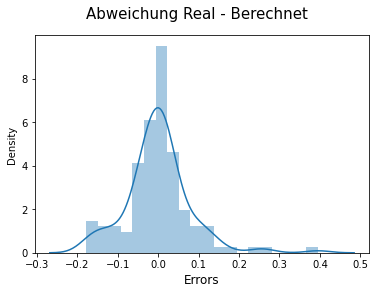

In [33]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Abweichung Real - Berechnet', fontsize = 15)                  # Plot heading
plt.xlabel('Errors', fontsize = 12)

# Anwenden des Modells auf den Testdatensatz

In [34]:
df_test1=df_test.copy()
y_test_USD = df_test1.pop('price')
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'horsepower','carlength','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
y_test = df_test.pop('price')
X_test = df_test

In [36]:
# Modell anwenden
X_train_new = X_train_new.drop('const',axis=1)
# Neuer Testdatensatz (weglassen der überflüssigen Spalten)
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [38]:
# Vorhersagen für y berechnen
y_pred = lm.predict(X_test_new)

# Vergleiche reale Daten mit den modellierten Daten
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7517814724918244

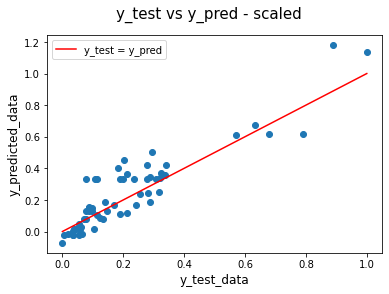

In [39]:
#Modell evaluieren
# Plotte y_test und y_pred in ein Streudiagramm
def linear_function(x):
    return 1* x

x_range = np.linspace(0, 1, 10)
y_function = linear_function(x_range)

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred - scaled', fontsize=15)
plt.xlabel('y_test_data', fontsize=12)
plt.ylabel('y_predicted_data', fontsize=12)
plt.plot(x_range, y_function, label='y_test = y_pred', color='red')
plt.legend()
plt.show()

In [40]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     119.1
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.43e-54
Time:                        13:33:12   Log-Likelihood:                 157.84
No. Observations:                 143   AIC:                            -299.7
Df Residuals:                     135   BIC:                            -276.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0114      0.033      0.351      0.7

--------------------------
# Zusammenfassung

* 86% der Varianz des Preises in den Trainingsdaten wird mit unserem Modell erklärt
* angewendet auf Testdaten performt das Modell immer noch gut und erklärt 75 % der Daten
* p-Wert des Modellfits ist kleiner als 0.05 - signifikantes Modell und nicht mit zufälligen Ereignissen erklärbar
* die p-Werte aller Koeffizienten liegen unter 0.05 und damit sind die entsprechenden Variablen (Predictors) statistisch signifikant
* price = 0.0181 + 0.1482 * wheelbase + 0.6391 * enginesize + 0.2589 * horsepower + 0.0715 * rwd + (-0.17) * four + (-0.0837) * six

  --> Preise skaliert (im Bereich zwischen 0 ... 1)
* Problematisch: wenige Daten für Autos im Hochpreis-Segment

# Schönheitskorrektur - Preise in USD

In [41]:
min_price = cars_lr['price'].min()
max_price = cars_lr['price'].max()
y_pred_USD = y_pred*(max_price-min_price)+min_price


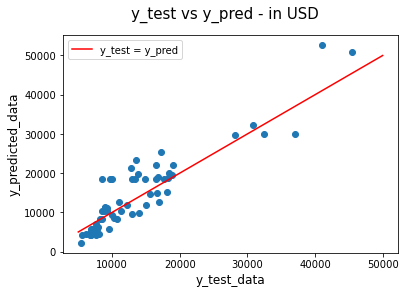

In [42]:
x_range = np.linspace(5000, 50000, 1000)
y_function = linear_function(x_range)

fig = plt.figure()
plt.scatter(y_test_USD,y_pred_USD)
fig.suptitle('y_test vs y_pred - in USD', fontsize=15)
plt.xlabel('y_test_data', fontsize=12)
plt.ylabel('y_predicted_data', fontsize=12)
plt.plot(x_range, y_function, label='y_test = y_pred', color='red')
plt.legend()
plt.show()

# Variante mit LinearRegression aus der SciKitLearn-Bibliothek





In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Modell trainieren

In [44]:
X_train_new = sm.add_constant(X_train_new)
X_test_new = sm.add_constant(X_test_new)

In [45]:
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression()

## Modellperformance an Trainingsdaten evaluieren

In [46]:
y_train_pred = model.predict(X_train_new)
r2_linreg = r2_score(y_train, y_train_pred)
print("R-squared (R²):", r2_linreg)

R-squared (R²): 0.8606047697763072


## Modell auf Testdaten anwenden und evaluieren

In [47]:
y_test_pred = model.predict(X_test_new)
r2_linreg = r2_score(y_test, y_test_pred)
print("R-squared (R²):", r2_linreg)

R-squared (R²): 0.7517814724918243


## Visualisieren

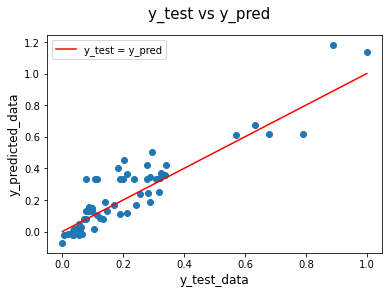

In [48]:
x_range = np.linspace(0, 1, 10)
y_function = linear_function(x_range)

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=15)
plt.xlabel('y_test_data', fontsize=12)
plt.ylabel('y_predicted_data', fontsize=12)
plt.plot(x_range, y_function, label='y_test = y_pred', color='red')
plt.legend()
plt.show()